In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import joblib
import numpy as np




In [ ]:
df = pd.read_csv("/Users/ethanjohn/Desktop/Data Science/Projects/MentalHealthDashboard/Students_Social_Media_Addiction_FE.csv")
print(df.columns)

In [ ]:
#General Usage Patterns
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))


sns.histplot(x="Avg_Daily_Usage_Hours",data=df, kde=True, ax=axes[0,0])
axes[0,0].set_title("Average Daily Usage Hours Distribution")



sns.boxplot(x="Gender", y = "Avg_Daily_Usage_Hours", data=df, ax=axes[0,1])
axes[0,1].set_title("Usage Hours by Gender")

sns.boxplot(x="Academic_Level", y = "Avg_Daily_Usage_Hours", data=df,ax=axes[1,0])
axes[1,0].set_title("Usage Hours by Academic Level")

sns.countplot(x = df["Affects_Academic_Performance"],ax=axes[1,1])
axes[1,1].set_title("Affects Academic Performance Counts")


plt.tight_layout()

In [ ]:
corr = df.corr(numeric_only=True)

threshold = 0.5
high_corr_pairs = (
    corr.where(abs(corr) >= threshold)
        .stack()              # drop NaNs
        .reset_index()
)

high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# remove duplicates (A,B) vs (B,A)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Feature1"] < high_corr_pairs["Feature2"]]

high_corr_pairs.sort_values(by="Correlation", ascending=False)


In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))

sns.boxplot(x=df["Gender"], y = df["Avg_Daily_Usage_Hours"], ax=axes[0,0])
axes[0,0].set_title("Daily Usage Hours by Gender")


sns.histplot(df["Sleep_Hours_Per_Night"],kde=True, ax=axes[0,1])
axes[0,1].set_title("Sleep Hours Distribution")

sns.scatterplot(
    x=df["Addicted_Score"],
    y = df["Mental_Health_Score"], 
    hue=df["Gender"], 
    ax = axes[1,0]
    )
axes[1,0].set_title("Addicted Score vs. Mental Health")

sns.countplot(
    x = df["Platform_Categories"],
    ax = axes[1,1]
)
axes[1,1].set_title("Most Used Platform Count")
#axes[1,1].ticks_params(axis = "x", rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))


sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Avg_Daily_Usage_Hours"], ax=axes[0,0])
axes[0,0].set_title("Social Media by Academic Performance")

sns.scatterplot(x=df["Sleep_Hours_Per_Night"], y = df["Addicted_Score"], ax=axes[0,1])
axes[0,1].set_title("Sleep and Addicted Score")

sns.boxplot(x=df["Relationship_Status"], y=df["Avg_Daily_Usage_Hours"], ax=axes[1,0])
axes[1,0].set_title("Social Media and Relationship Status")

sns.countplot(x=df["Conflicts_Over_Social_Media"], ax=axes[1,1])
axes[1,1].set_title("Conflicts over Social Media Count")

plt.tight_layout()
plt.show()



In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,6))


sns.scatterplot(x=df["Sleep_Hours_Per_Night"], y = df["Wellbeing_Score"], ax=axes[0,0])
axes[0,0].set_title("Sleep & Well Being")

country_counts = df["Country"].value_counts()
countries_keep = country_counts[country_counts >= 25].index

df_filtered = df[df["Country"].isin(countries_keep)]

sns.barplot(x= df_filtered["Country"], y=df_filtered["Avg_Daily_Usage_Hours"], data=df_filtered, ax=axes[0,1])
axes[0,1].set_title("Daily Usage by Country")

sns.boxplot(x=df["Platform_Categories"], y=df["Addicted_Score"], ax=axes[1,0])
axes[1,0].set_title("Addicted Scores by Platform Category")

sns.boxplot(x=df["Academic_Level"], y=df["Mental_Health_Score"], ax=axes[1,1])
axes[1,1].set_title("Mental Health Score by Academic Level")


plt.tight_layout()
plt.show()


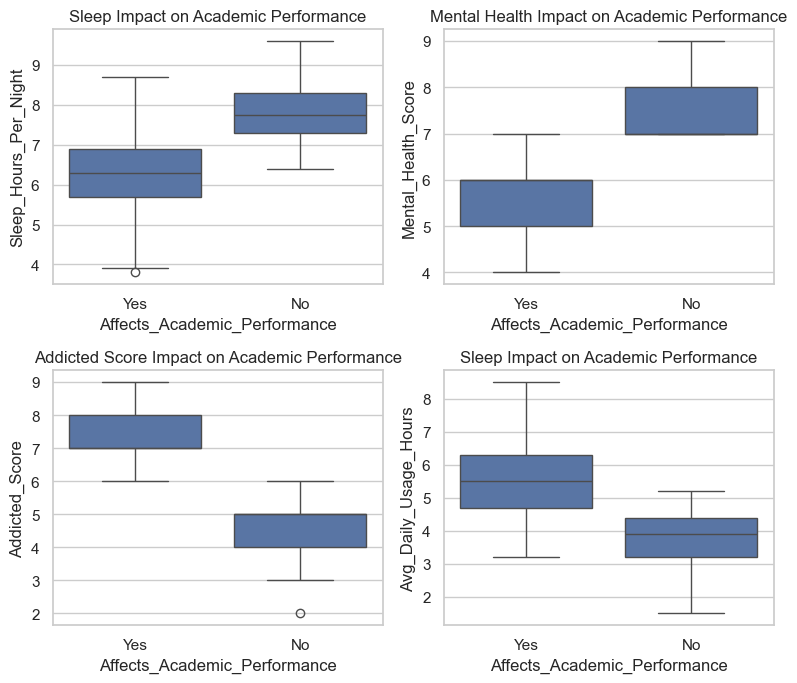

In [4]:
# Graphs about academic performance

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))

# Compare affects_academic performance (yes/no) with these variables: Sleep, Mental Health, Addicted, Daily Hours

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Sleep_Hours_Per_Night"], ax=axes[0,0])
axes[0,0].set_title("Sleep Impact on Academic Performance")

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Mental_Health_Score"], ax=axes[0,1])
axes[0,1].set_title("Mental Health Impact on Academic Performance")

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Addicted_Score"], ax=axes[1,0])
axes[1,0].set_title("Addicted Score Impact on Academic Performance")

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Avg_Daily_Usage_Hours"], ax=axes[1,1])
axes[1,1].set_title("Sleep Impact on Academic Performance")

plt.tight_layout()
plt.show()


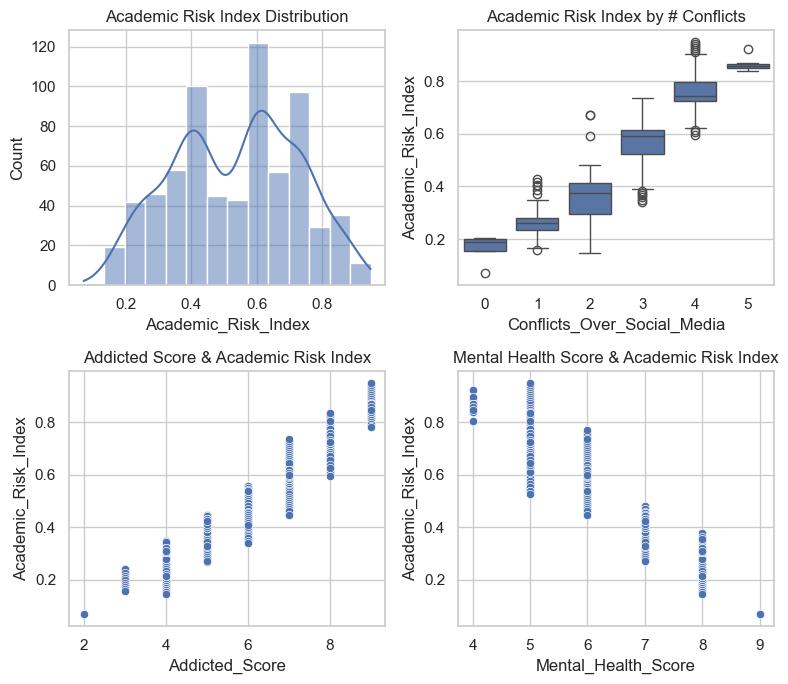

In [3]:
# Graphs about Academic Risk Index (feature engineered column)
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2,figsize=(8,7))

sns.histplot(x="Academic_Risk_Index", data=df,kde=True,ax=axes[0,0])
axes[0,0].set_title("Academic Risk Index Distribution")

sns.boxplot(x="Conflicts_Over_Social_Media",y="Academic_Risk_Index",data=df,ax=axes[0,1])
axes[0,1].set_title("Academic Risk Index by # Conflicts")

sns.scatterplot(x="Addicted_Score",y="Academic_Risk_Index",data=df,ax=axes[1,0])
axes[1,0].set_title("Addicted Score & Academic Risk Index")

sns.scatterplot(x="Mental_Health_Score",y="Academic_Risk_Index",data=df,ax=axes[1,1])
axes[1,1].set_title("Mental Health Score & Academic Risk Index")

plt.tight_layout()


In [ ]:
ari_corr = df.corr(numeric_only=True)["Academic_Risk_Index"].sort_values(ascending=False)
print(ari_corr)



In [ ]:
aap_corr = df.corr(numeric_only=True)["Affects_Academic_Performance_Encoded"].sort_values(ascending=False)
print(aap_corr)

In [7]:
A_raw_pred = (
    0.70 * df["Avg_Daily_Usage_Hours"] +
    0.15 * df["Conflicts_Over_Social_Media"] +
    0.15 * np.maximum(0, 8 - df["Sleep_Hours_Per_Night"])
)

A_bias_addicted = df["Addicted_Score"].mean() - A_raw_pred.mean()

A_final_pred = np.clip(A_raw_pred + A_bias_addicted, 0, 10)
A_mae = mean_absolute_error(df["Addicted_Score"], A_final_pred)
print(f"Bias Factor: {A_bias_addicted}")
print(f"Mean Absolute Error: {A_mae}")

Bias Factor: 2.384070921985816
Mean Absolute Error: 0.6636801569337559


In [8]:
MH_raw_pred = (
    0.6 * df["Sleep_Hours_Per_Night"] -
    0.25 * df["Avg_Daily_Usage_Hours"] -
    0.15 * df["Conflicts_Over_Social_Media"]
)

MH_bias_addicted = df["Mental_Health_Score"].mean() - MH_raw_pred.mean()


MH_final_pred = np.clip(MH_raw_pred+MH_bias_addicted,0,10)
MH_mae = mean_absolute_error(df["Mental_Health_Score"], MH_final_pred)
print(f"Bias factor: {MH_bias_addicted}")
print(f"MAE: {MH_mae}")

bias_params = {
    "MH_Bias_Factor": MH_bias_addicted,
    "AS_Bias_Factor": A_bias_addicted
}

joblib.dump(bias_params,"bias_params.pkl")

Bias factor: 3.762716312056738
MAE: 0.5114251597002162


['bias_params.pkl']